# Project for the course: Computational Mathematics
## Group 1: Fois Giulia, Manini Nicolas

 ### Parsing of the execution data of the algorithm and preliminary anlysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the summary csv, and the csv containing the execution logs for each task

In [2]:
DatasetFolder = 'Preliminary_Random'
SummaryFile = 'summary.csv'
LogsFolder = 'logs'

summary_path = "{}/{}".format(DatasetFolder, SummaryFile)
logs_path = "{}/{}".format(DatasetFolder, LogsFolder)

In [3]:
dfSum = pd.read_csv(summary_path)
TaskNames = dfSum['InputName']

def getTaskNames(batch, batchidx):
    batch = str(batch)
    batchidx=str(batchidx)
    isTask = lambda x: (x.split('_')[1]==batch) & (x.split('_')[2]==batchidx)
    return list(filter(isTask, TaskNames))

dfSum['Batch'] = dfSum['InputName'].str.split('_').str[1]
dfSum['BatchIndex'] = dfSum['InputName'].str.split('_').str[2]
dfSum['KIndex'] = dfSum['InputName'].str.split('_').str[3]

dfSum['Batch'] = dfSum['Batch'].astype(int)
dfSum['BatchIndex'] = dfSum['BatchIndex'].astype(int)
dfSum['KIndex'] = dfSum['KIndex'].astype(int)

dfSum['TimeIter'] = dfSum['Our_time'].div(dfSum['Our_Iter'])
dfSum['TimeDelta_1Iter'] = dfSum['Svd_time'] - dfSum['TimeIter']
dfSum['ConvenientIters'] = np.floor(dfSum['Svd_time'] .div(dfSum['TimeIter']))

Batches = (dfSum['Batch'].unique())
Batches.sort()

In [4]:
import os

dfLogs = {}

# Read all execution logs
for filename in filter(lambda x:x.endswith(".csv"), os.listdir(logs_path)):
    fn = os.path.splitext(filename)[0]
    name = fn[5:]
    dfTemp = pd.read_csv("{}/{}".format(logs_path, filename))
    dfTemp['ErrorRatio'] = (abs(dfTemp['Error'] - dfTemp['Error'].shift(1))).div(dfTemp['Error'].shift(1))
    dfLogs[name] = dfTemp  

In [5]:
dfSum

InputName  InputM  InputN  InputRk  TargetRk  Opt_delta  Our_delta  \
0     rnd_10_1_1      80      80       80         2   0.962294   0.962498   
1    rnd_10_1_10      80      80       80        79   0.006044   0.006044   
2     rnd_10_1_2      80      80       80        11   0.797418   0.797487   
3     rnd_10_1_3      80      80       80        19   0.659516   0.659626   
4     rnd_10_1_4      80      80       80        28   0.503170   0.503174   
..           ...     ...     ...      ...       ...        ...        ...   
661    rnd_9_3_5      40      40       40        18   0.438761   0.438768   
662    rnd_9_3_6      40      40       40        23   0.295563   0.295564   
663    rnd_9_3_7      40      40       40        27   0.193263   0.193264   
664    rnd_9_3_8      40      40       40        31   0.116531   0.116532   
665    rnd_9_3_9      40      40       40        35   0.037608   0.037608   

       Delta_diff  Svd_time  Our_time  Time_gain  Our_Iter  Batch  BatchIndex  \
0    2.043905e-04  0.000909  0.073610  -0.072701        89     10           1   
1    9.919739e-08  0.000909  0.646943  -0.646035       141     10           1   
2    6.878249e-05  0.000909  0.188441  -0.187532       160     10           1   
3    1.095774e-04  0.000909  0.254163  -0.253254       139     10           1   
4    4.202893e-06  0.000909  0.148769  -0.147860        72     10           1   
..            ...       ...       ...        ...       ...    ...         ...   
661  6.606251e-06  0.000330  0.162737  -0.162407       230      9           3   
662  8.585072e-07  0.000330  0.076284  -0.075954        38      9           3   
663  3.900055e-07  0.000330  0.049731  -0.049401        51      9           3   
664  1.353285e-06  0.000330  0.113910  -0.113580       107      9           3   
665  4.482073e-08  0.000330  0.036019  -0.035689        30      9           3   

     KIndex  TimeIter  TimeDelta_1Iter  ConvenientIters  
0         1  0.000827         0.000082              1.0  
1        10  0.004588        -0.003679              0.0  
2         2  0.001178        -0.000269              0.0  
3         3  0.001829        -0.000920              0.0  
4         4  0.002066        -0.001157              0.0  
..      ...       ...              ...              ...  
661       5  0.000708        -0.000378              0.0  
662       6  0.002007        -0.001677              0.0  
663       7  0.000975        -0.000645              0.0  
664       8  0.001065        -0.000735              0.0  
665       9  0.001201        -0.000871              0.0  

[666 rows x 18 columns]

Filter batches based on shape

In [6]:
RectFull = [1,2,3,4,5,6]
SqFull = [7,8,9,10,11,12]
RectNotFull = [13,14,15,16,17,18]
SqNotFull = [19,20,21,22,23,24]

### Preliminary plots

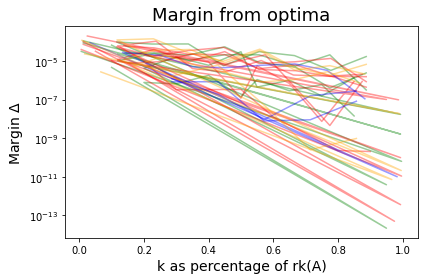

In [7]:
import random as rnd
rnd.seed(12)

plt.yscale('log')

BB = Batches

for b in BB:
    bidxs = dfSum[dfSum['Batch'] == b]['BatchIndex'].unique()
    kidxs = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidxs[0])]['KIndex'].unique()
    nks = len(kidxs)
    for bidx in bidxs:
        ks = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['TargetRk']
        
        origRank = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputRk'].iloc[0]
        xax = ks/origRank
        
        matrixM = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputM'].iloc[0]
        matrixN = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputN'].iloc[0]
        
        matrixMin = min(matrixM, matrixN)
        isFull = (matrixMin == origRank)
        isSquare = matrixM == matrixN
        
        if isFull:
            if isSquare:
                clr = 'red'
            else:
                clr = 'green'
        else:
            if isSquare:
                clr = 'orange'
            else:
                clr = 'blue'
            
            
        yax = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['Delta_diff']
        
        
        if (rnd.random() < 0.20): 
            plt.plot(xax, yax, color=clr, alpha=0.4)
            
            
plt.title("Margin from optima", fontsize=18)
plt.xlabel("k as percentage of rk(A)", fontsize=14)
plt.ylabel(r'Margin $\Delta$', fontsize=14)
plt.tight_layout()
plt.savefig('confronto_forma_singular.png', format='png', dpi=300)
plt.show()

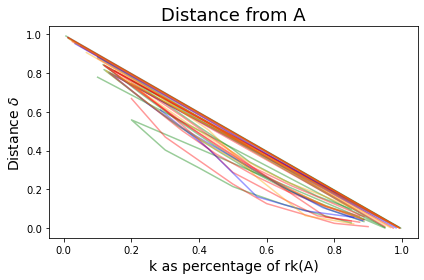

In [8]:
import random as rnd
rnd.seed(12)

plt.yscale('linear')

BB = Batches

for b in BB:
    bidxs = dfSum[dfSum['Batch'] == b]['BatchIndex'].unique()
    kidxs = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidxs[0])]['KIndex'].unique()
    nks = len(kidxs)
    for bidx in bidxs:
        ks = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['TargetRk']
        
        origRank = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputRk'].iloc[0]
        xax = ks/origRank
        
        matrixM = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputM'].iloc[0]
        matrixN = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['InputN'].iloc[0]
        
        matrixMin = min(matrixM, matrixN)
        isFull = (matrixMin == origRank)
        isSquare = matrixM == matrixN
        
        if isFull:
            if isSquare:
                clr = 'red'
            else:
                clr = 'green'
        else:
            if isSquare:
                clr = 'orange'
            else:
                clr = 'blue'
            
            
        yax = dfSum[(dfSum['Batch'] == b) & (dfSum['BatchIndex'] == bidx)]['Our_delta']
        
        
        if (rnd.random() < 0.15): #20, 15 for other plot
            plt.plot(xax, yax, color=clr, alpha=0.4)
            
            
plt.title("Distance from A", fontsize=18)
plt.xlabel("k as percentage of rk(A)", fontsize=14)
plt.ylabel(r'Distance $\delta$', fontsize=14)

plt.tight_layout()
plt.savefig('confronto_andamento_lineare.png', format='png', dpi=300)
plt.show()